# Spotify ETL Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('scripts/data/recent_tracks.csv')

In [3]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   played_at                     29 non-null     object 
 1   track_name                    29 non-null     object 
 2   track_id                      29 non-null     object 
 3   track_duration_ms             29 non-null     int64  
 4   popularity                    29 non-null     int64  
 5   track_uri                     29 non-null     object 
 6   is_playable                   29 non-null     bool   
 7   album_name                    29 non-null     object 
 8   album_id                      29 non-null     object 
 9   album_release_date            29 non-null     object 
 10  album_release_date_precision  29 non-null     object 
 11  album_total_tracks            29 non-null     int64  
 12  album_type                    29 non-null     object 
 13  album_i

In [4]:
# first 5 rows of the data
df.head()

,played_at,track_name,track_id,track_duration_ms,popularity,track_uri,is_playable,album_name,album_id,album_release_date,album_release_date_precision,album_total_tracks,album_type,album_images,album_label,artist_name,artist_ids,artist_genres
0,2024-08-23 12:06:01,i like the way you kiss me,3JG1uFc40wfyrqaWC7iv0e,142514,80,spotify:track:3JG1uFc40wfyrqaWC7iv0e,True,yustyna,5nzSCZ7NhKvAysI0tmNOdD,2024-07-11,day,14,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Artemas,0PCCGZ0wGLizHt2KZ7hhA2,NaN
1,2024-08-23 12:03:38,Apple,19RybK6XDbAVpcdxSbZL1o,151739,89,spotify:track:19RybK6XDbAVpcdxSbZL1o,True,BRAT,2lIZef4lzdvZkiiCzvPKj7,2024-06-07,day,15,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Charli xcx,25uiPmTg16RbhZWAqwLBy5,"art pop, candy pop, metropopolis, pop, uk pop"
2,2024-08-23 12:01:05,Austin (Boots Stop Workin'),2uqYupMHANxnwgeiXTZXzd,171782,91,spotify:track:2uqYupMHANxnwgeiXTZXzd,True,What Happens Now?,40HsqPqeSR9Xe3IyAJWr6e,2024-02-16,day,8,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Dasha,7Ez6lTtSMjMf2YSYpukP1I,NaN
3,2024-08-23 11:58:14,HOT TO GO!,4xdBrk0nFZaP54vvZj0yx7,184841,91,spotify:track:4xdBrk0nFZaP54vvZj0yx7,True,The Rise and Fall of a Midwest Princess,0EiI8ylL0FmWWpgHVTsZjZ,2023-09-22,day,14,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Chappell Roan,7GlBOeep6PqTfFi59PTUUN,"indie pop, pov: indie"
4,2024-08-23 11:55:08,we can't be friends (wait for your love),51ZQ1vr10ffzbwIjDCwqm4,228639,89,spotify:track:51ZQ1vr10ffzbwIjDCwqm4,True,eternal sunshine,5EYKrEDnKhhcNxGedaRQeK,2024-03-08,day,13,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,pop


In [5]:
# check for missing values
df.isnull().sum()

played_at                        0
track_name                       0
track_id                         0
track_duration_ms                0
popularity                       0
track_uri                        0
is_playable                      0
album_name                       0
album_id                         0
album_release_date               0
album_release_date_precision     0
album_total_tracks               0
album_type                       0
album_images                     0
album_label                     29
artist_name                      0
artist_ids                       0
artist_genres                    3
dtype: int64

### Some numbers

In [6]:
unique_tracks = df['track_name'].nunique()
print(f"Total unique tracks: {unique_tracks}")

Total unique tracks: 29


In [7]:
unique_artists = df['artist_name'].nunique()
print(f"Total unique artists: {unique_artists}")

Total unique artists: 27


In [8]:
unique_genres = df['artist_genres'].nunique()
print(f"Total unique genres: {unique_genres}")

Total unique genres: 20


### Top tracks and artists

In [9]:
top_tracks = df['track_name'].value_counts().head(10)
print("Top 10 tracks:")
print(top_tracks)

Top 10 tracks:
track_name
i like the way you kiss me       1
Too Sweet                        1
Who                              1
Espresso                         1
Please Please Please             1
Si Antes Te Hubiera Conocido     1
Good Luck, Babe!                 1
Big Dawgs                        1
Guess featuring Billie Eilish    1
Beautiful Things                 1
Name: count, dtype: int64


In [10]:
top_artists = df['artist_name'].value_counts().head(10)
print("Top 10 artists:")
print(top_artists)

Top 10 artists:
artist_name
Chappell Roan                       2
Sabrina Carpenter                   2
Artemas                             1
Sevdaliza, Pabllo Vittar, Yseult    1
Jimin                               1
KAROL G                             1
Hanumankind, Kalmi                  1
Charli xcx, Billie Eilish           1
Benson Boone                        1
FloyyMenor, Cris Mj                 1
Name: count, dtype: int64


### times when I listen to music 

In [11]:
# 'playd_at' column is in string format, convert it to datetime
df['played_at'] = pd.to_datetime(df['played_at'])

# create new columns for year, month, day, day of week and hour
df['day_of_month'] = df['played_at'].dt.day
df['day_of_week'] = df['played_at'].dt.day_name()
df['hour_of_day'] = df['played_at'].dt.hour

df.head()

,played_at,track_name,track_id,track_duration_ms,popularity,track_uri,is_playable,album_name,album_id,album_release_date,...,album_total_tracks,album_type,album_images,album_label,artist_name,artist_ids,artist_genres,day_of_month,day_of_week,hour_of_day
0,2024-08-23 12:06:01,i like the way you kiss me,3JG1uFc40wfyrqaWC7iv0e,142514,80,spotify:track:3JG1uFc40wfyrqaWC7iv0e,True,yustyna,5nzSCZ7NhKvAysI0tmNOdD,2024-07-11,...,14,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Artemas,0PCCGZ0wGLizHt2KZ7hhA2,NaN,23,Friday,12
1,2024-08-23 12:03:38,Apple,19RybK6XDbAVpcdxSbZL1o,151739,89,spotify:track:19RybK6XDbAVpcdxSbZL1o,True,BRAT,2lIZef4lzdvZkiiCzvPKj7,2024-06-07,...,15,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Charli xcx,25uiPmTg16RbhZWAqwLBy5,"art pop, candy pop, metropopolis, pop, uk pop",23,Friday,12
2,2024-08-23 12:01:05,Austin (Boots Stop Workin'),2uqYupMHANxnwgeiXTZXzd,171782,91,spotify:track:2uqYupMHANxnwgeiXTZXzd,True,What Happens Now?,40HsqPqeSR9Xe3IyAJWr6e,2024-02-16,...,8,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Dasha,7Ez6lTtSMjMf2YSYpukP1I,NaN,23,Friday,12
3,2024-08-23 11:58:14,HOT TO GO!,4xdBrk0nFZaP54vvZj0yx7,184841,91,spotify:track:4xdBrk0nFZaP54vvZj0yx7,True,The Rise and Fall of a Midwest Princess,0EiI8ylL0FmWWpgHVTsZjZ,2023-09-22,...,14,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Chappell Roan,7GlBOeep6PqTfFi59PTUUN,"indie pop, pov: indie",23,Friday,11
4,2024-08-23 11:55:08,we can't be friends (wait for your love),51ZQ1vr10ffzbwIjDCwqm4,228639,89,spotify:track:51ZQ1vr10ffzbwIjDCwqm4,True,eternal sunshine,5EYKrEDnKhhcNxGedaRQeK,2024-03-08,...,13,album,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",NaN,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,pop,23,Friday,11


In [12]:
weekday_counts = df['day_of_week'].value_counts()
print("Listening habits by day of week:")
print(weekday_counts)

Listening habits by day of week:
day_of_week
Friday    29
Name: count, dtype: int64


In [13]:
hourly_counts = df['hour_of_day'].value_counts().sort_index()
print("Listening habits by hour of day:")
print(hourly_counts)

Listening habits by hour of day:
hour_of_day
10     8
11    18
12     3
Name: count, dtype: int64


### top genres

In [14]:
top_genres = df['artist_genres'].value_counts().head(10)
print("Top 10 genres:")
print(top_genres)

Top 10 genres:
artist_genres
pop                                                            4
art pop, candy pop, metropopolis, pop, uk pop                  2
singer-songwriter pop                                          2
indie pop, pov: indie                                          2
conscious hip hop, hip hop, rap, west coast rap                1
k-pop                                                          1
reggaeton, reggaeton colombiano, trap latino, urbano latino    1
desi hip hop, indian underground rap, malayalam hip hop        1
reggaeton chileno                                              1
boy band, dance pop, pop                                       1
Name: count, dtype: int64


### Data Visualization

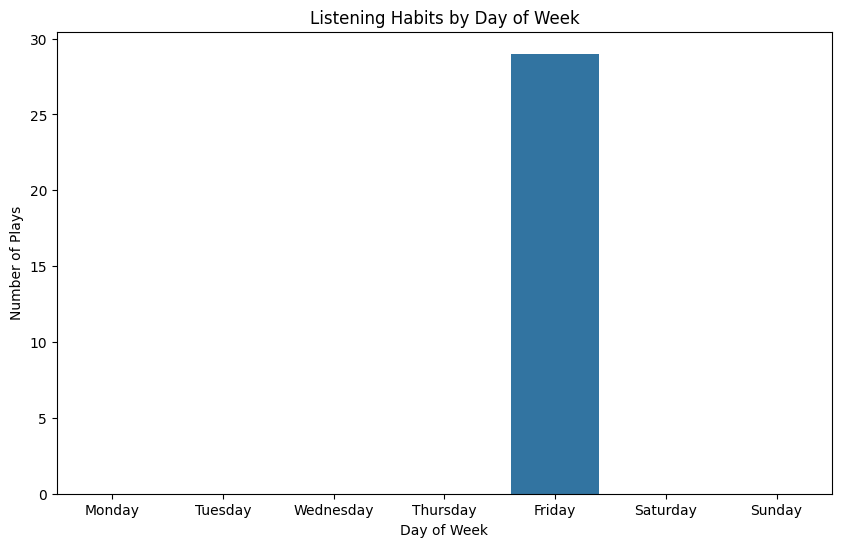

In [15]:
# Kuuntelutottumukset eri viikonpäivinä
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Listening Habits by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Plays')
plt.show()

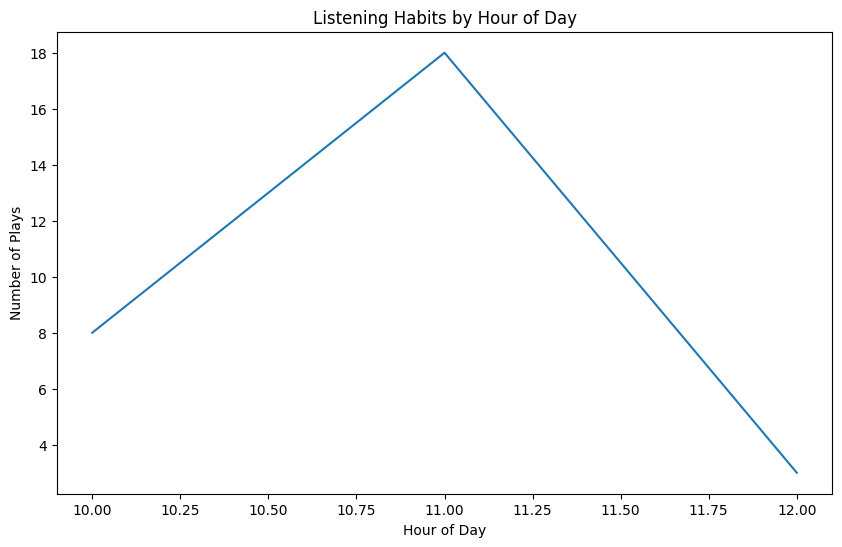

In [16]:
# listening habits by hour of day
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts)
plt.title('Listening Habits by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.show()

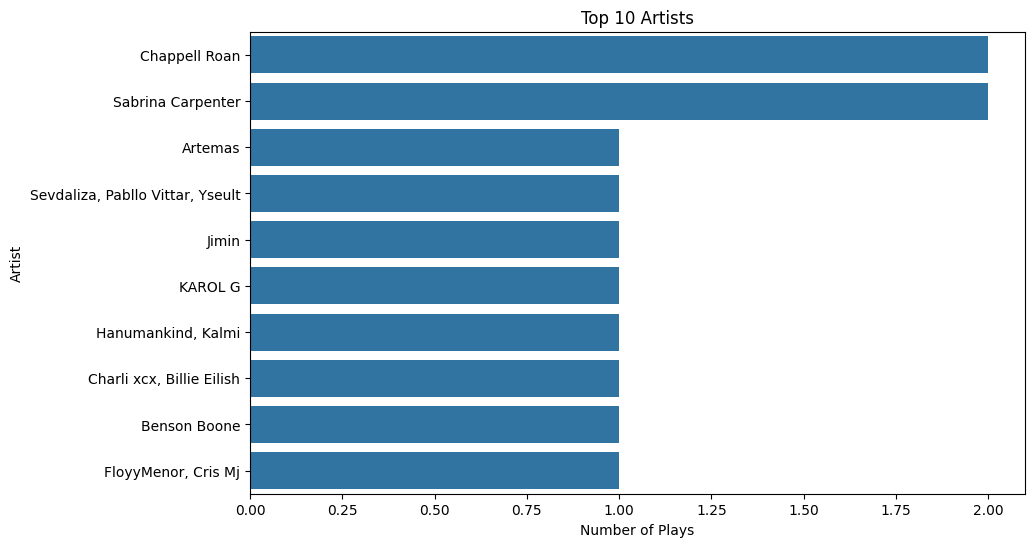

In [18]:
# top artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists')
plt.xlabel('Number of Plays')
plt.ylabel('Artist')
plt.show()